## Observations and Insights 

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set variables to prevent typo
mouse_id_str = "Mouse ID"
drug_reg_str = "Drug Regimen"
weight_str = "Weight (g)"
timepoint_str = "Timepoint"
tumor_vol_str = "Tumor Volume (mm3)"

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how = "outer", on = mouse_id_str)

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check data frame information
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice
number_of_mice = combined_data_df[mouse_id_str].nunique()
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated([mouse_id_str, timepoint_str]), mouse_id_str].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data_df.loc[combined_data_df[mouse_id_str] == duplicate_mice[0]]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_combined_data_df = combined_data_df[combined_data_df[mouse_id_str].isin(duplicate_mice) == False]
cleaned_combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = cleaned_combined_data_df[mouse_id_str].nunique()
mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Extracting mean for the mean of each regimen
tumor_volume_mean = cleaned_combined_data_df.groupby(drug_reg_str).mean()[tumor_vol_str]

# Extracting median for the mean of each regimen
tumor_volume_med = cleaned_combined_data_df.groupby(drug_reg_str).median()[tumor_vol_str]

# Extracting variance for the mean of each regimen
tumor_volume_var = cleaned_combined_data_df.groupby(drug_reg_str).var()[tumor_vol_str]

# Extracting standard deviation for the mean of each regimen
tumor_volume_std = cleaned_combined_data_df.groupby(drug_reg_str).std()[tumor_vol_str]

# Extracting SEM for the mean of each regimen
tumor_volume_sem = cleaned_combined_data_df.groupby(drug_reg_str).sem()[tumor_vol_str]

# Create data frame for the summary
statistic_summary1 = pd.DataFrame({"Mean of Tumor Volume": tumor_volume_mean,
                                   "Median of Tumor Volume": tumor_volume_med,
                                   "Variance of Tumor Volume": tumor_volume_var,
                                   "STD of Tumor Volume": tumor_volume_std,
                                   "SEM of Tumor Volume": tumor_volume_sem})
statistic_summary1.round(2)

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Single group by function
statistic_summary2 = cleaned_combined_data_df.groupby([drug_reg_str])[[tumor_vol_str]].agg(["mean", "median", "var", "std", "sem"])
statistic_summary2.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

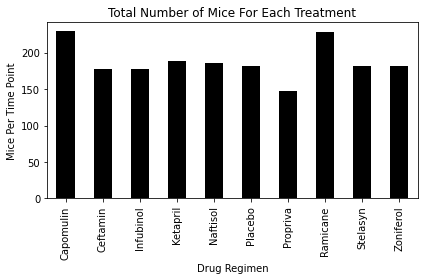

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Calculate the total number of mice per treatment for the graph
mice_per_treat = cleaned_combined_data_df.groupby([drug_reg_str]).count()[mouse_id_str]

# Plot using pandas
mice_per_treat.plot.bar(color = "black")
plt.title("Total Number of Mice For Each Treatment")
plt.xlabel(drug_reg_str)
plt.ylabel("Mice Per Time Point")
plt.tight_layout()
plt.show()

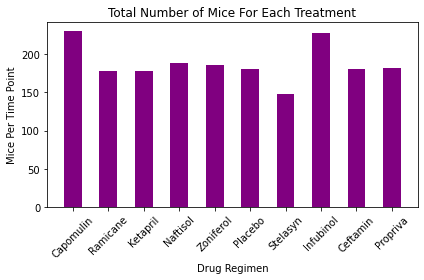

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Prepare x-axis
drug_regimen_list = cleaned_combined_data_df[drug_reg_str].value_counts().index

# Prepare y-axis
mice_per_treat2 = cleaned_combined_data_df.groupby([drug_reg_str]).count()[mouse_id_str].tolist()

# Plot using pyplot
plt.bar(drug_regimen_list, mice_per_treat, width = 0.5, color = "purple")
plt.xticks(drug_regimen_list, rotation = 45)
plt.title("Total Number of Mice For Each Treatment")
plt.xlabel(drug_reg_str)
plt.ylabel("Mice Per Time Point")
plt.tight_layout()
plt.show()

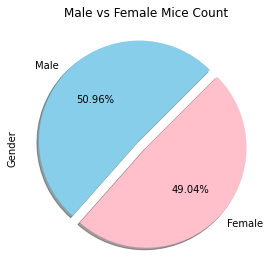

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Getting data for counts of male and female
grouped_gender  = pd.value_counts(cleaned_combined_data_df["Sex"])

# Plot using pandas
colors = ["skyblue", "pink"]
explode  = (0.1, 0)
pandas_plot = grouped_gender.plot.pie(startangle = 45,
                                      colors = colors,
                                      explode = explode,
                                      shadow = True,
                                      autopct = "%1.2f%%")
plt.title("Male vs Female Mice Count")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

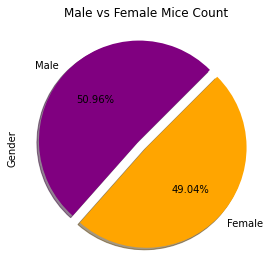

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Preparation for plotting
grouped_gender2 = grouped_gender.tolist()
colors = ["purple", "orange"]
labels = ["Male", "Female"]
plt.pie(grouped_gender2,
        labels = labels,
        startangle = 45,
        colors = colors,
        explode = explode,
        shadow = True,
        autopct = "%1.2f%%")
plt.title("Male vs Female Mice Count")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []   

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
selected_regimen = cleaned_combined_data_df[cleaned_combined_data_df[drug_reg_str].isin(treatment_list)]

last_timepoint = selected_regimen.groupby([drug_reg_str, mouse_id_str]).agg(tumor_vol_list = (tumor_vol_str, lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level = 0).unstack(level = 0)

treatment = 0
for drug in treatment_list:
    quartiles = last_timepoint[drug].quantile([0.25, 0.5, 0.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5 * iqr), 2)
    upper_bound = round(upperq + (1.5 * iqr), 2)
    
    if treatment == 0:
        print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} potential outliers.")
    print(f"Values above {upper_bound} could be {drug} potential outliers.")
    print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    treatment += 1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Values below 20.71 could be Capomulin potential outliers.
Values above 51.83 could be Capomulin potential outliers.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Values below 17.91 could be Ramicane potential outliers.
Values above 54.31 could be Ramicane potential outliers.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Values below 36.83 could be Infubinol potential outliers.
Values above 82.75 could be Infubinol potential outliers.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of C

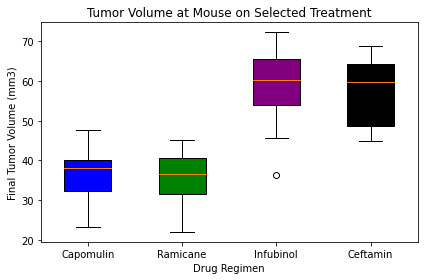

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for row in treatment_list:
    tumor_vol_list.append(list(last_timepoint[row].dropna()))
    
fig = plt.figure()
box = plt.boxplot(tumor_vol_list, labels = treatment_list, widths = 0.5, patch_artist = True)
plt.title("Tumor Volume at Mouse on Selected Treatment")
plt.xlabel(drug_reg_str)
plt.ylabel("Final %s" % tumor_vol_str)
colors = ["blue", "green", "purple", "black"]

for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

    plt.tight_layout()
plt.show()

## Line and Scatter Plots

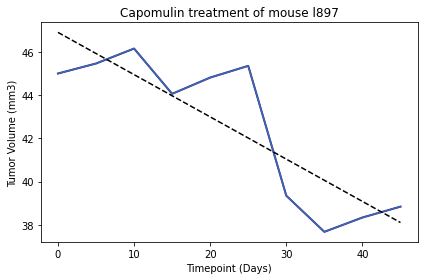

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = cleaned_combined_data_df.loc[combined_data_df[drug_reg_str] == "Capomulin"]

# Drop duplicated Mouse Id to make sure random pick chances are even
capomulin_df_drop_dup = capomulin_df.drop_duplicates(subset = mouse_id_str, keep = "last")

# Set-up random pick
mouse = capomulin_df.sample()
picked_mouse = mouse.iloc[0].at[mouse_id_str]
line_plot_df = capomulin_df.loc[capomulin_df[mouse_id_str] == picked_mouse]

x_axis = line_plot_df[timepoint_str]
y_axis = line_plot_df[tumor_vol_str]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse %s" % picked_mouse)
plt.plot(x_axis, y_axis, linewidth = 2, markersize = 15, color = "purple")
plt.xlabel("%s (Days)" % timepoint_str)
plt.ylabel(tumor_vol_str)
coef = np.polyfit(x_axis, y_axis, 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_axis, y_axis, x_axis, poly1d_fn(x_axis), "--k")
plt.tight_layout()
plt.show()

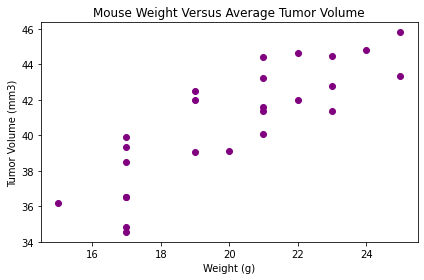

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df_mean = capomulin_df.groupby([mouse_id_str]).mean()

plt.scatter(capomulin_df_mean[weight_str], capomulin_df_mean[tumor_vol_str], color = "purple")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel(weight_str)
plt.ylabel(tumor_vol_str)
plt.tight_layout()
plt.show()

## Correlation and Regression

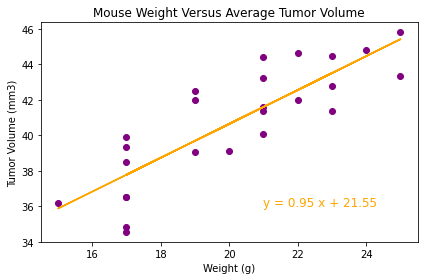

In [19]:
# Calculate the correlation coefficient and linear regression model
corr = st.pearsonr(capomulin_df_mean[weight_str], capomulin_df_mean[tumor_vol_str])
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df_mean[weight_str], capomulin_df_mean[tumor_vol_str])
regress_values = capomulin_df_mean[weight_str] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# For mouse weight and average tumor volume for the Capomulin regimen
color = "orange"
plt.scatter(capomulin_df_mean[weight_str], capomulin_df_mean[tumor_vol_str], color = "purple")
plt.plot(capomulin_df_mean[weight_str], regress_values, color = color)
plt.annotate(line_eq, (21, 36), fontsize = 12, color = color)
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel(weight_str)
plt.ylabel(tumor_vol_str)
plt.tight_layout()
plt.show()